In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('calendar_activity_dataset_enhanced.csv')
df.head()

,Gender,Activity begin time,Activity Name,Physical Intensity,Mental Intensity,Health Score,Activity end time,total time
0,M,06:51,Running,High,Low,63,07:51,1.0
1,F,23:02,Reading,Low,High,49,00:32,1.5
2,M,11:57,Meditation,Low,High,52,14:03,2.1
3,M,09:27,Cooking,Medium,Medium,55,10:33,1.1
4,M,02:36,Work Meeting,Medium,High,53,04:12,1.6


In [3]:
intensity_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

df['Physical'] = df['Physical Intensity'].map(intensity_mapping)
df['Mental'] = df['Mental Intensity'].map(intensity_mapping)
df['Activity begin time'] = pd.to_datetime(df['Activity begin time'], format='%H:%M').dt.hour * 60 + pd.to_datetime(df['Activity begin time'], format='%H:%M').dt.minute
df['Activity end time'] = pd.to_datetime(df['Activity end time'], format='%H:%M').dt.hour * 60 + pd.to_datetime(df['Activity end time'], format='%H:%M').dt.minute

# Create a new column for total duration in minutes
df['Total Duration'] = df['Activity end time'] - df['Activity begin time']
df.head()

,Gender,Activity begin time,Activity Name,Physical Intensity,Mental Intensity,Health Score,Activity end time,total time,Physical,Mental,Total Duration
0,M,411,Running,High,Low,63,471,1.0,3,1,60
1,F,1382,Reading,Low,High,49,32,1.5,1,3,-1350
2,M,717,Meditation,Low,High,52,843,2.1,1,3,126
3,M,567,Cooking,Medium,Medium,55,633,1.1,2,2,66
4,M,156,Work Meeting,Medium,High,53,252,1.6,2,3,96


Activity end time    Activity begin time    0.69
Activity begin time  Activity end time      0.69
Health Score         Physical               0.60
Physical             Health Score           0.60
Total Duration       Activity end time      0.39
Activity end time    Total Duration         0.39
dtype: float64


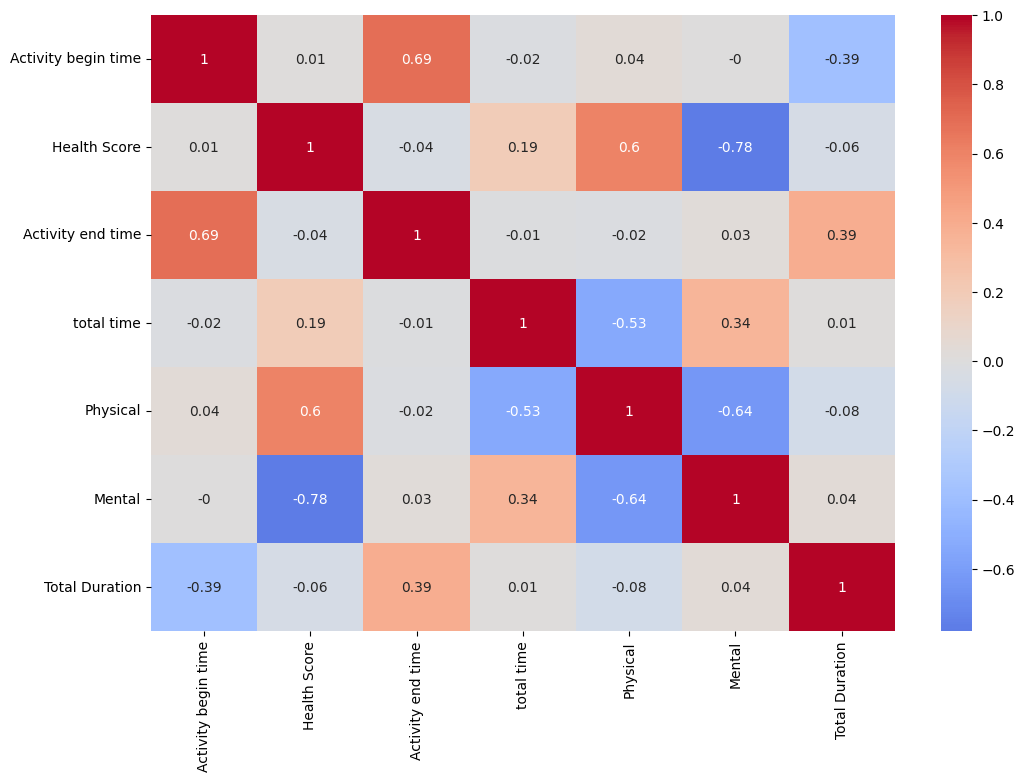

In [4]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr().round(2)
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', 
center=0)

# convert to one dimensional array
sorted_correlations = correlation_matrix.unstack().sort_values(ascending=False)
# chose nine strongest correlation and remove self correlation
strongest_correlations = sorted_correlations[sorted_correlations < 1].head(6)
print(strongest_correlations)

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['Gender'])

Activity begin time  Activity end time      0.69
Activity end time    Activity begin time    0.69
Health Score         Physical               0.60
Physical             Health Score           0.60
Total Duration       Activity end time      0.39
Activity end time    Total Duration         0.39
dtype: float64


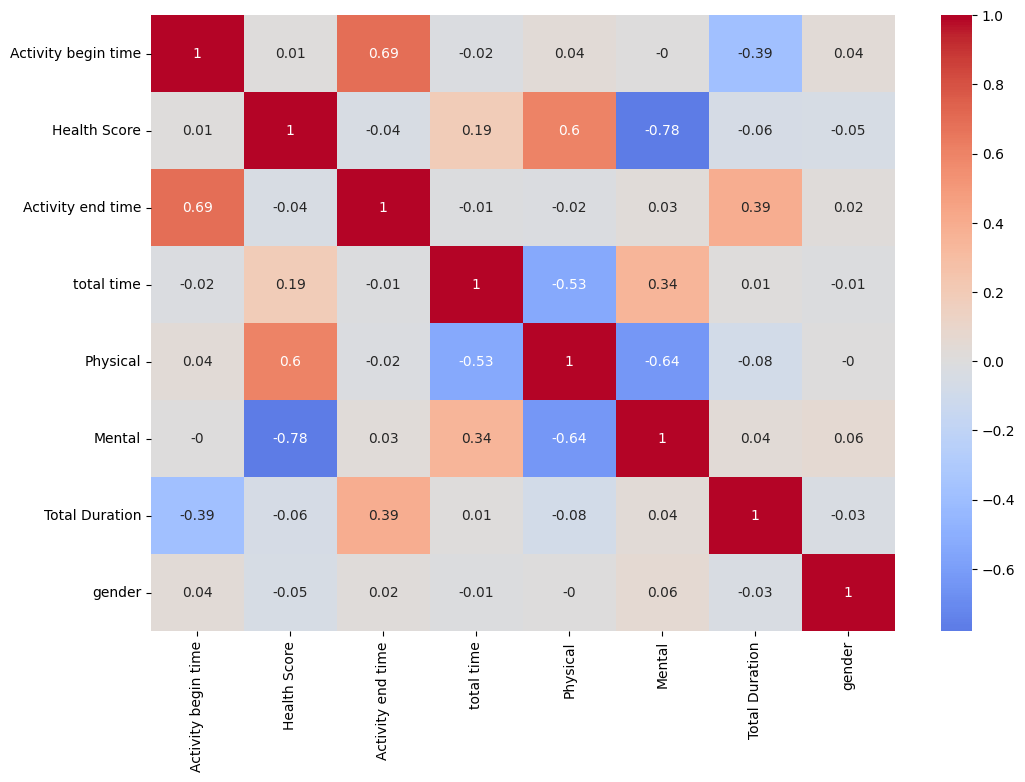

In [6]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr().round(2)
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', 
center=0)

# convert to one dimensional array
sorted_correlations = correlation_matrix.unstack().sort_values(ascending=False)
# chose nine strongest correlation and remove self correlation
strongest_correlations = sorted_correlations[sorted_correlations < 1].head(6)
print(strongest_correlations)

# MLP

In [7]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPRegressor

In [8]:
X = df[['gender','Mental','Physical','total time']]
y = df['Health Score']

In [9]:
# 创建 MLP 回归模型
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=100, random_state=42)

# 定义 KFold 交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 使用交叉验证评估模型
cv_scores = cross_val_score(mlp, X, y, cv=kf, scoring='neg_mean_squared_error')

# 输出每折的负均方误差
print("MSE for each fold: ", -cv_scores)  # 取负值变回正数
print(f"Average mse: {np.mean(-cv_scores):.2f} ± {np.std(-cv_scores):.2f}")

MSE for each fold:  [426.24077371 453.17217863 496.33484455 482.71876434 481.63694038]
Average mse: 468.02 ± 25.18


C:\Users\lixia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lixia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lixia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lixia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

In [10]:
print()